# Data Handling:

### In this section, we will focus on data handling. This Python notebook is designed to explain what we did to handle the data and why.

**Written by: Nadav Bitran Numa and Maor Bezalel**

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages.

**Using the following libraries:**

In [1136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import re
%matplotlib inline


## Loading the main dataset

In [1137]:
nadlan_df = pd.read_csv("AllCities.csv")

## Basic data Exploration

In this section, we will look at how many records we received for the city of Holon

In [1138]:
nadlan_df.shape

(294177, 10)

In [1139]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294177 entries, 0 to 294176
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        294177 non-null  object 
 1   City             294177 non-null  object 
 2   Neighborhood     294177 non-null  object 
 3   Street           265288 non-null  object 
 4   Building_Number  265288 non-null  float64
 5   Property_Type    259196 non-null  object 
 6   Rooms            294177 non-null  float64
 7   Floor            268369 non-null  object 
 8   Square_Meter     294177 non-null  float64
 9   Price            294177 non-null  object 
dtypes: float64(3), object(7)
memory usage: 22.4+ MB


#### Table:

In [1140]:
cities_len_dict = {city:len(nadlan_df[nadlan_df["City"] == city]) for city in nadlan_df["City"].unique()}
cities_len_df = pd.DataFrame({"City":cities_len_dict.keys(), "Number_Of_Housing_Units":cities_len_dict.values()})

#### Visualization:

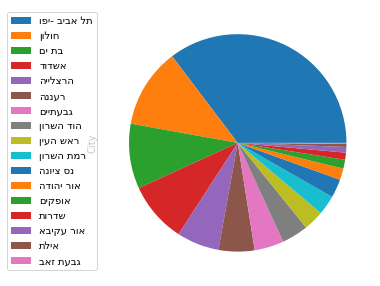

In [1189]:
cities_len_df = cities_len_df.sort_values(by=['Number_Of_Housing_Units'],ascending=False)
cities_len_df.reset_index(drop=True,inplace=True)

figure = plt.figure(figsize = (10,5))
ax = plt.gca()
labels = []
for i in range(len(cities_len_df)):
    labels.append(cities_len_df['City'][i][::-1])

nadlan_df.City.value_counts().plot(kind="pie",labels=None)
ax.legend(labels , bbox_to_anchor=(0,1), fontsize=10)

[Text(0, 0, 'ופי- ביבא לת'),
 Text(0, 1, 'ןולוח'),
 Text(0, 2, 'םי תב'),
 Text(0, 3, 'דודשא'),
 Text(0, 4, 'היילצרה'),
 Text(0, 5, 'הננער'),
 Text(0, 6, 'םייתעבג'),
 Text(0, 7, 'ןורשה דוה'),
 Text(0, 8, 'ןיעה שאר'),
 Text(0, 9, 'ןורשה תמר'),
 Text(0, 10, 'הנויצ סנ'),
 Text(0, 11, 'הדוהי רוא'),
 Text(0, 12, 'םיקפוא'),
 Text(0, 13, 'תורדש'),
 Text(0, 14, 'אביקע רוא'),
 Text(0, 15, 'תליא'),
 Text(0, 16, 'באז תעבג')]

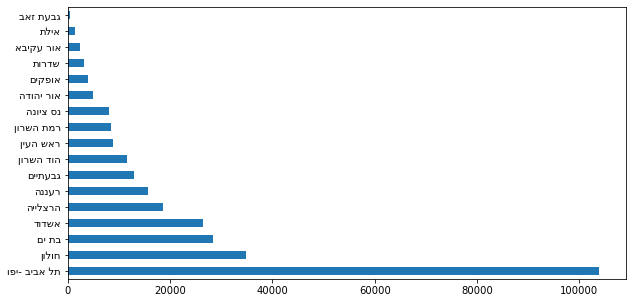

In [1198]:
figure = plt.figure(figsize = (10,5))
ax2 = plt.gca()
nadlan_df.City.value_counts().plot(kind="barh")

## Basic data Exploration: Conclusions

1) As we can see, we have about 294,177 records 

2) But now we have reached an important conclusion that will accompany us later on: 
 **as you can see, the column "Street" and the column "Building_Number" are the only ones in which there is no shortage of data. But is this really true?... The answer is no!!!**
For all other columns, the missing data is hidden under an empty string consisting solely of a space.

i.e. that even before starting the treatment, we need to locate all this data and turn it into NaN values:

## Replacing spaces into NaN values:

In [1041]:
for column in nadlan_df.columns:
    nadlan_df[column].replace(to_replace=' ', value=np.nan, inplace=True)

In [1042]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294177 entries, 0 to 294176
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        294177 non-null  object 
 1   City             294177 non-null  object 
 2   Neighborhood     294177 non-null  object 
 3   Street           265288 non-null  object 
 4   Building_Number  265288 non-null  float64
 5   Property_Type    259196 non-null  object 
 6   Rooms            294177 non-null  float64
 7   Floor            268369 non-null  object 
 8   Square_Meter     294177 non-null  float64
 9   Price            294177 non-null  object 
dtypes: float64(3), object(7)
memory usage: 22.4+ MB


## Replacing spaces into NaN values: Conclusions
Once we've sorted out the issue before, we can officially begin the data handling process!. And the first thing we will start with is: removing data that we are not interested in

# 

# 

# Step 1: The data handling - Duplication Phase

## 1.1: Removing Fully Duplicated Rows:

In [1043]:
print(f"Number Of Duplicated Rows (Before Handling): {sum(nadlan_df.duplicated())}")
nadlan_df.drop_duplicates(subset=None,keep="first",inplace=True)
print(f"Number Of Duplicated Rows (After Handling): {sum(nadlan_df.duplicated())}")

nadlan_df.info()

Number Of Duplicated Rows (Before Handling): 1211
Number Of Duplicated Rows (After Handling): 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 292966 entries, 0 to 294176
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        292966 non-null  object 
 1   City             292966 non-null  object 
 2   Neighborhood     292966 non-null  object 
 3   Street           264145 non-null  object 
 4   Building_Number  264145 non-null  float64
 5   Property_Type    258109 non-null  object 
 6   Rooms            292966 non-null  float64
 7   Floor            267428 non-null  object 
 8   Square_Meter     292966 non-null  float64
 9   Price            292966 non-null  object 
dtypes: float64(3), object(7)
memory usage: 24.6+ MB


# Step 2: The data handling - Main Phase

Because the date of sale columns, and the city name column are full (*and will always be filled according to the way we redeemed our scraper*). We can start straight from handling the neighbors column:

## 2.1: Neighborhood Column

### 2.1.1: Removing Data About Neighborhoods Industrial Zones

The first thing we need to do, is to get rid of all the records belonging to the neighborhoods of industrial zones. **From the simple assumption that all records from there are not related to residential apartments**

In [1044]:
print("Before:")
nadlan_df[nadlan_df["Neighborhood"].str.contains("אזור תעשיה") == True]

Before:


,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
0,13.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,187.0,"3,454,000"
1,10.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,250.0,"4,041,000"
2,09.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,250.0,"323,000"
3,28.12.2021,אשדוד,אזור תעשיה הצפוני,החרושת,229.0,תעשיה,0.0,NaN,3542.0,"31,888,000"
4,04.10.2021,אשדוד,אזור תעשיה הצפוני,הפלדה,345.0,משרד,0.0,ראשונה,1063.0,"4,450,000"
...,...,...,...,...,...,...,...,...,...,...
187211,21.12.2001,שדרות,אזור תעשיה,NaN,NaN,NaN,3.0,NaN,60.0,"181,000"
187212,30.12.1999,שדרות,אזור תעשיה,NaN,NaN,NaN,0.0,NaN,3021.0,"1,564,000"
187213,27.05.1999,שדרות,אזור תעשיה,NaN,NaN,NaN,0.0,NaN,30.0,"124,000"
187214,24.05.1999,שדרות,אזור תעשיה,NaN,NaN,NaN,3.0,רביעית,60.0,"267,000"


In [1045]:
nadlan_df.drop(index=nadlan_df[nadlan_df['Neighborhood'].str.contains("אזור תעשיה")==True].index, inplace=True)

In [1046]:
print("After:")
nadlan_df[nadlan_df['Neighborhood'].str.contains("אזור תעשיה")==True]

nadlan_df.info()

After:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 288689 entries, 1028 to 294176
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        288689 non-null  object 
 1   City             288689 non-null  object 
 2   Neighborhood     288689 non-null  object 
 3   Street           261115 non-null  object 
 4   Building_Number  261115 non-null  float64
 5   Property_Type    254259 non-null  object 
 6   Rooms            288689 non-null  float64
 7   Floor            263916 non-null  object 
 8   Square_Meter     288689 non-null  float64
 9   Price            288689 non-null  object 
dtypes: float64(3), object(7)
memory usage: 24.2+ MB


## Neighborhood Column: Conclusions
Apart from removing the industrial zones, there is no need for additional handling of this column. So we can move on to the street name column

# 

##  2.2: Street Column & Building_Number Column

### 2.2.1: Replacing NaN values in Street column with Unknown

In [1047]:
nadlan_df.Street.fillna("Unknown",inplace=True)

### 2.2.2: Replacing NaN values in Building_Number column with -1

In [1048]:
nadlan_df.Building_Number.fillna(-1, inplace=True)

## Street Column & Building_Number Column: Conclustions
Apart from substituting the NaN value to Unknown and -1, there is no need to provide special care for these columns. Therefore, we can move on to the first column where we will have to start with a more advanced treatment: the propety type column

# 

## 2.3: Property_Type Column:

## 2.3.1: Removing all other unwanted building types

### In the "Property_Type" column, we have a lot of property types that do not represent residential residences.
### To get rid of them, we will only keep those who do.

In [1049]:
to_keep_list = [
    "דירה בבית קומות",
    "דירה",
    "קוטג' דו משפחתי",
    "קוטג' חד משפחתי",
    "קוטג' טורי",
    "בית בודד",
    "דירת גן",
    "דירת גג",
    "דירת גג (פנטהאוז)",
    "דופלקס",
    "מיני פנטהאוז",
    "חד משפחתי (וילה)"
]
nadlan_df = nadlan_df[nadlan_df["Property_Type"].isin(to_keep_list)]

In [1050]:
nadlan_df.Property_Type.value_counts()

df1 = nadlan_df[nadlan_df['Property_Type']=='דירה']
df2 = df1[(df1['Floor'].str.contains('קרקע')) | (df1['Floor'].str.contains('ראשונה'))]
sf2SM = df2['Square_Meter']
t = sf2SM.value_counts().sort_index(axis = 0)

#nadlan_df[(nadlan_df["Floor"].str.contains("קרקע") == True)]["Property_Type"].value_counts()

### 2.3.2: Removing any remaining NaN values

In [1051]:
nadlan_df.dropna(subset=["Property_Type"], how='any', axis=0, inplace=True)

### 2.3.3: Uniting all similar apartment types into one type

In [1052]:
to_replace_dict = {
    'דירת גג (פנטהאוז)': "דירת גג",
    "מיני פנטהאוז": "דירת גג",
    "קוטג' חד משפחתי": "קוטג'",
    "קוטג' דו משפחתי": "קוטג'",
    "קוטג' טורי": "קוטג'",
    "בית בודד": "בית פרטי",
    "חד משפחתי (וילה)": "בית פרטי",
    "דופלקס": "דירת גג",
    "דירה בבית קומות": "דירה בבניין"
}

nadlan_df.replace(to_replace_dict, inplace=True)

nadlan_df.Property_Type.value_counts()


דירה בבניין    217806
קוטג'           11732
דירת גן          2198
דירת גג          1767
בית פרטי         1310
Name: Property_Type, dtype: int64

### 2.3.4: Turning the column from a string to a categorical variable type

In [1053]:
temp = list(nadlan_df.Property_Type.unique())
temp.sort(reverse=True)
temp_range = range(len(temp))
replace_map = dict(zip(temp, temp_range))

nadlan_df.replace(replace_map, inplace=True)
nadlan_df.Property_Type.unique()

array([3, 2, 1, 0, 4], dtype=int64)

In [1054]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234813 entries, 1031 to 294134
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        234813 non-null  object 
 1   City             234813 non-null  object 
 2   Neighborhood     234813 non-null  object 
 3   Street           234813 non-null  object 
 4   Building_Number  234813 non-null  float64
 5   Property_Type    234813 non-null  int64  
 6   Rooms            234813 non-null  float64
 7   Floor            222053 non-null  object 
 8   Square_Meter     234813 non-null  float64
 9   Price            234813 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ MB


## Property_Type Column: Conclusions
In this column, we made the following changes: 
1) We created a dictionary data structure, to filter so that only records on the type of residential buildings remain
2) We removed all NaN values in favor of step 3-4
3) Now that there are a small number of types of structures left, we will unite the types that are similar to one type.
4) Now that there are 6 types of apartments left, we will convert the column to a categorical variable

0: קוטג'

1: דירת גן

2: דירת גג

3: דירה בבניין

4: דירה

5: בית פרטי

# 

## 2.4: Rooms Column:

### 2.4.1: Removing all apartments that contain 0 rooms

In [1055]:
nadlan_df.drop(index=nadlan_df[nadlan_df['Rooms']==0].index, inplace=True)

In [1056]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234495 entries, 1031 to 294134
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        234495 non-null  object 
 1   City             234495 non-null  object 
 2   Neighborhood     234495 non-null  object 
 3   Street           234495 non-null  object 
 4   Building_Number  234495 non-null  float64
 5   Property_Type    234495 non-null  int64  
 6   Rooms            234495 non-null  float64
 7   Floor            221877 non-null  object 
 8   Square_Meter     234495 non-null  float64
 9   Price            234495 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ MB


## Rooms Column: Conclusions
The removal was due to the following conclusion: 0-room apartments can happen for two reasons: 

first, when it is not an apartment at all, but a purchased area in which it is planned to build housing units in the future. 

second reason, some error. 

Whatever the reason, in both situations we will not be able to use these records 

# 

## 2.5: Floor Column:

### 2.5.1: Switching all values in the floor column to a numeric value

In [1059]:
# טיפול בעמודת הקומות
floor_dict =  {
    "קרקע": 0,
    "ראשונה": 1,
    "שניה": 2,
    "שלישית": 3,
    "רביעית": 4,
    "חמישית": 5,
    "שישית": 6,
    "שביעית": 7,
    "שמינית": 8,
    "תשיעית": 9,
    "עשירית": 10,
    "אחת עשרה": 11,
    "שתים עשרה": 12,
    "שלוש עשרה": 13,
    "ארבע עשרה": 14,
    "חמש עשרה": 15,
    "שש עשרה": 16,
    "שבע עשרה": 17,
    "שמונה עשרה": 18,
    "תשע עשרה": 19,
    "עשרים": 20,
    "עשרים ואחת": 21,
    "עשרים ושתיים": 22,
    "עשרים ושלוש": 23,
    "עשרים וארבע": 24,
    "עשרים וחמש": 25,
    "עשרים ושש": 26,
    "עשרים ושבע": 27,
    "עשרים ושמונה":28,
    "עשרים ותשע":29,
    "שלושים":30,
    "שלושים ואחת":31,
    "שלושים ושתים":32,
    "שלושים ושלוש":33,
    "שלושים וארבע":34,
    "שלושים וחמש":35,
    "שלושים ושש":36,
    "שלושים ושבע":37,
    "שלושים ושמונה":38,
    "שלושים ותשע":39,
    "ארבעים":40,
    "ארבעים ואחת":41,
    "ארבעים ושתיים":42,
    "ארבעים ושלוש":43,
    "ארבעים וארבע":44,
    "ארבעים וחמש":45,
    "ארבעים ושש":46,
    "ארבעים ושבע":47,
    "ארבעים ושמונה":48,
    "ארבעים ותשע":49,
    "חמישים":50,
    "חמישים ואחת":51,
    "חמישים ושתיים":52,
    "חמישים ושלוש":53,
    "חמישים וארבע":54,
}
floor_dict2 = {}
for i in range(54):
    floor_dict2[ f"קומה {i}"] = i
    
nadlan_df['Floor'].replace(floor_dict,inplace=True)
nadlan_df['Floor'].replace(floor_dict2,inplace=True)

nadlan_df.dropna(subset=['Floor'],how="any",axis=0,inplace=True)

As you can see, we did handle a significant part of the floor column, but you can see that there are values ​​that have not changed yet, this is due to the strange way in which the floor number is written on the website

In [1060]:
nadlan_df[nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
2351,07.08.2022,אשדוד,מרינה,אקסודוס,18.0,3,5.0,"קומה 1, קומה 2",242.10,"4,300,000"
2357,20.02.2022,אשדוד,מרינה,אקסודוס,14.0,1,6.0,"מרתף -1, קומה 0",176.80,"2,125,000"
2360,25.01.2022,אשדוד,מרינה,אקסודוס,10.0,0,5.0,מרתף+קרקע+ראשונה,170.80,"3,700,000"
2400,23.10.2020,אשדוד,מרינה,אקסודוס,3.0,3,5.0,"שמינית, תשיעית",153.30,"2,850,000"
2417,23.03.2020,אשדוד,מרינה,אקסודוס,8.0,0,5.0,מרתף+קרקע+ראשונה,170.80,"3,500,000"
...,...,...,...,...,...,...,...,...,...,...
293935,22.11.2007,תל אביב -יפו,תל חיים,פוזננסקי שמואל,4.0,3,5.0,שלישית ורבעית,94.40,"828,000"
293937,05.11.2007,תל אביב -יפו,תל חיים,הרב רייפמן,18.0,3,5.0,קרקע + ראשונה,119.72,"1,385,000"
293966,12.03.2007,תל אביב -יפו,תל חיים,בובר שלמה,2.0,3,5.0,קרקע+ראשונה+שניה+גג,135.95,"1,680,000"
294041,04.04.2004,תל אביב -יפו,תל חיים,עמישב,7.0,3,5.0,שלישית ורביעית,99.80,"1,286,000"


The other types were written in a very cumbersome way, **how can we know what the floor number is???**

Let's start with the simple things:
It is enough that a house's floor contains the word קרקע to know that it is a house on the ground floor.

In [1061]:
nadlan_df_FloorHandled = nadlan_df[nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==False]
nadlan_df_FloorYetHandled_Ver1 = nadlan_df[(nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==True) & (nadlan_df['Floor'].str.contains('קרקע')==True)]
nadlan_df_FloorYetHandled_Ver2 = nadlan_df[(nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==True) & (nadlan_df['Floor'].str.contains('קרקע')==False)]

It can be easily seen that indeed all these records are private houses
Therefore, we will put them under the category: 0

In [1062]:
nadlan_df_FloorYetHandled_Ver1 = nadlan_df_FloorYetHandled_Ver1.assign(Floor=0)
nadlan_df_FloorHandled = pd.concat([nadlan_df_FloorHandled,nadlan_df_FloorYetHandled_Ver1],ignore_index=True)
print(len(nadlan_df_FloorYetHandled_Ver2))

10540


**Now, We Have About 10K left to go**
How do we proceed?
It can be seen that all the other types of floors that remained the same in terms of their structure.
They contain several floors.
But we should not jump to conclusions and declare that this is a private house on floor number 0, because there are non-private houses that can occupy two floors and even more.

**For the continuation we will go with the following rule:**

**The floor of apartment X will be determined by the minimum floor value that appears in its sequence**

In [1063]:
floor_dict_reverse = dict((value, key) for key, value in floor_dict.items())
floor_dict_reverse2 = dict((value,key) for key, value in floor_dict2.items())
for i in range(54):
    nadlan_df_FloorYetHandled_Ver2_SubVer1 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(floor_dict_reverse[i])==True)]
    nadlan_df_FloorYetHandled_Ver2_SubVer2 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(floor_dict_reverse2[i]))==True]
    nadlan_df_FloorYetHandled_Ver2_SubVer3 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(floor_dict_reverse[i])==False) & (nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(floor_dict_reverse2[i])==False)]
    nadlan_df_FloorYetHandled_Ver2_SubVer1 = nadlan_df_FloorYetHandled_Ver2_SubVer1.assign(Floor=i)
    nadlan_df_FloorYetHandled_Ver2_SubVer2 = nadlan_df_FloorYetHandled_Ver2_SubVer2.assign(Floor=i)
    nadlan_df_FloorHandled = pd.concat([nadlan_df_FloorHandled,nadlan_df_FloorYetHandled_Ver2_SubVer1,nadlan_df_FloorYetHandled_Ver2_SubVer2],axis=0,ignore_index=True)
    nadlan_df_FloorYetHandled_Ver2 = nadlan_df_FloorYetHandled_Ver2_SubVer3

**Now, we are left with only about 3000 entries!**

In [1064]:
nadlan_df_FloorYetHandled_Ver2

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
4464,14.08.2014,אשדוד,רובע א,נורדאו,14.0,3,4.5,גג,116.0,"1,290,000"
21092,27.04.2015,אשדוד,"רובע י""ב",אדר,4.0,3,4.0,מרתף -2,124.0,"1,420,000"
21213,22.06.2014,אשדוד,"רובע י""ב",אדר,4.0,3,4.0,מרתף -2,96.0,"1,345,000"
22146,28.02.2005,אשדוד,"רובע י""ב",תמוז,14.0,3,4.0,מרתף -1,96.0,"680,000"
27984,08.06.2022,בת ים,בית וגן,Unknown,-1.0,3,3.0,העמודים,76.0,"1,745,000"
...,...,...,...,...,...,...,...,...,...,...
292086,17.12.2003,תל אביב -יפו,תכנית ל,אשכול לוי,34.0,1,2.0,מרתף,58.2,"612,000"
292746,01.04.2015,תל אביב -יפו,תל ברוך צפון,פן אלכסנדר,23.0,3,3.0,שנייה,80.0,"2,550,000"
292982,04.02.2009,תל אביב -יפו,תל ברוך צפון,צוויג סטפן,15.0,3,3.0,מרתף שני,81.0,"1,575,000"
293519,15.11.2021,תל אביב -יפו,תל חיים,בובר שלמה,22.0,3,4.0,------,108.7,"3,500,000"


You can see that all the remaining records contain values ​​we don't want,
We can't use the top floor because we don't know what the floor number is
Therefore, We'll not use them

In [1065]:
nadlan_df = nadlan_df_FloorHandled
nadlan_df['Floor'] = pd.to_numeric(nadlan_df['Floor'],errors='coerce')
nadlan_df.dropna(subset=['Floor'],inplace=True)

## Floor Column: Conclusions:
**We managed to take care of the Floor values, we minimized to the maximum the amount of "losses" of the data that happened as a result of this treatment.**

# 

## 2.6: Square_Meter Column

### 2.6.1: Removing all apartments that do not have the square area specified

In [1066]:
nadlan_df.dropna(subset = ['Square_Meter'],how="any",axis=0,inplace=True)

In [1067]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218939 entries, 0 to 218964
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        218939 non-null  object 
 1   City             218939 non-null  object 
 2   Neighborhood     218939 non-null  object 
 3   Street           218939 non-null  object 
 4   Building_Number  218939 non-null  float64
 5   Property_Type    218939 non-null  int64  
 6   Rooms            218939 non-null  float64
 7   Floor            218939 non-null  float64
 8   Square_Meter     218939 non-null  float64
 9   Price            218939 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 18.4+ MB


## Square_Meter Column: Conclusions
There was no missing value in this column

# 

## 2.7 Price Column

### 2.7.1: Switching price values to numeric values only (removing the commas)

In [1068]:
nadlan_df['Price'] = nadlan_df['Price'].str.replace(',','')

In [1069]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218939 entries, 0 to 218964
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        218939 non-null  object 
 1   City             218939 non-null  object 
 2   Neighborhood     218939 non-null  object 
 3   Street           218939 non-null  object 
 4   Building_Number  218939 non-null  float64
 5   Property_Type    218939 non-null  int64  
 6   Rooms            218939 non-null  float64
 7   Floor            218939 non-null  float64
 8   Square_Meter     218939 non-null  float64
 9   Price            218939 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 18.4+ MB


# 

# Step 2: Conclusions
**At this point, we finished handling most of the columns ,we:**

**handled duplicates**

**handeled missing values**

**filled in missing values if necessary**

**and preformed various manipulations on the columns to change them to numeric values or categorical variables.**

**You can see that the number of records has been reduced by about 27%! (from 38K to 28K)**

What do we have left now?
You can see that most columns are defined as an object, so now that we've done the handling, we can define the column types 

In [1070]:
nadlan_df.Property_Type = nadlan_df.Property_Type.astype('category')

nadlan_df['Building_Number'] = pd.to_numeric(nadlan_df['Building_Number'])
nadlan_df.Building_Number = nadlan_df.Building_Number.astype('int32')

nadlan_df['Rooms'] = pd.to_numeric(nadlan_df['Rooms'])
nadlan_df.Rooms = nadlan_df.Rooms.astype("float32")

nadlan_df['Floor'] = pd.to_numeric(nadlan_df['Floor'])
nadlan_df.Floor = nadlan_df.Floor.astype("int32")

nadlan_df['Square_Meter'] = pd.to_numeric(nadlan_df['Square_Meter'])
nadlan_df.Square_Meter = nadlan_df.Square_Meter.astype("float32")

nadlan_df['Price'] = pd.to_numeric(nadlan_df['Price'])
nadlan_df.Price = nadlan_df.Price.astype('int32')

nadlan_df['Sale_Date'] = pd.to_datetime(nadlan_df['Sale_Date'],format='%d.%m.%Y',errors="coerce")

nadlan_df.reset_index(drop=True,inplace=True)
nadlan_df.head()

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
0,2022-12-20,אשדוד,"הקריה מע""ר",Unknown,-1,3,5.0,8,227.0,3500000
1,2022-12-05,אשדוד,"הקריה מע""ר",Unknown,-1,3,3.0,3,81.0,2370000
2,2022-11-30,אשדוד,"הקריה מע""ר",כינור,4,3,5.0,4,201.0,3100000
3,2022-11-24,אשדוד,"הקריה מע""ר",Unknown,-1,3,5.0,13,137.0,3550000
4,2022-11-23,אשדוד,"הקריה מע""ר",Unknown,-1,3,3.0,1,77.0,2099000


In [1071]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218939 entries, 0 to 218938
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_Date        218939 non-null  datetime64[ns]
 1   City             218939 non-null  object        
 2   Neighborhood     218939 non-null  object        
 3   Street           218939 non-null  object        
 4   Building_Number  218939 non-null  int32         
 5   Property_Type    218939 non-null  category      
 6   Rooms            218939 non-null  float32       
 7   Floor            218939 non-null  int32         
 8   Square_Meter     218939 non-null  float32       
 9   Price            218939 non-null  int32         
dtypes: category(1), datetime64[ns](1), float32(2), int32(3), object(3)
memory usage: 11.1+ MB


You can see that almost all the columns we moved to basic variables, int,float,string, etc. But only the field of sale of the apartment we converted to a Datetime object. This will serve us later in extracting the year of sale of the apartment

# 

Now, we will try to address abnormal values, our treatment will focus on both columns: apartment price and square meter

# Step 3: The Data Handling - Outliers

## 3.1: Square_Meter Column Outliers:

[Text(0.5, 1.0, 'Square_Meter Outliers Check - BoxPlot')]

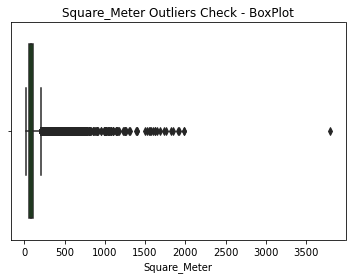

In [1072]:
sns.boxplot(
    data = nadlan_df,
    x=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square_Meter Outliers Check - BoxPlot")

[Text(0.5, 1.0, 'Square Meter Outliers - ViolinPlot')]

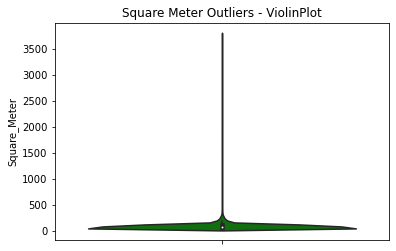

In [1073]:
sns.violinplot(
    data = nadlan_df,
    y=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square Meter Outliers - ViolinPlot")

#### You can clearly see that there is a long tail to the exceptional values, some of which reach even more than 1000 square meters, of course these records are not really apartments but probably areas 

In [1074]:
nadlan_df['Square_Meter'].describe()

count    218939.000000
mean         91.110527
std          52.179924
min          20.040001
25%          60.360001
50%          83.300003
75%         110.000000
max        3800.000000
Name: Square_Meter, dtype: float64

In [1075]:
IQR = np.percentile(nadlan_df['Square_Meter'],75) - np.percentile(nadlan_df['Square_Meter'],25)
print(f"Max 'Normal' Value By Deault Of 1.5IQR {nadlan_df['Square_Meter'].median() + 1.5*IQR}")
print(f"Min 'Normal' Value By Deault Of 1.5IQR {nadlan_df['Square_Meter'].median() - 1.5*IQR}")

Max 'Normal' Value By Deault Of 1.5IQR 157.76000213623047
Min 'Normal' Value By Deault Of 1.5IQR 8.840003967285156


#### We Can See That A Max Normal Value By 1.5IQR Is 157, Which isn't enough.
#### Becasue There's Indeed Some Special 150+ Squere_Meter Appartments, Lets Assume that 300 is the maximum for an appartment to not be an outlier
#### Also, We'll Set The minimum for an appartment to be at least 30 Squere_Meter

In [1076]:
sum((nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30))

3092

#### There's Only Below 5600 Of Them, So We'll Delete Them

In [1077]:
nadlan_df.drop(index=nadlan_df[(nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30)].index,inplace=True)
nadlan_df[(nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30)]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price


## 3.2: Price Column Outliers:

[Text(0.5, 1.0, 'Price Outliers Check - BoxPlot')]

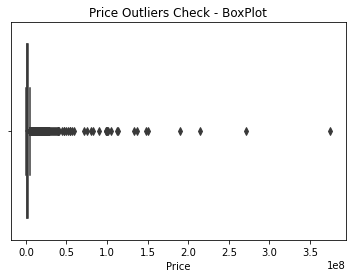

In [1078]:
sns.boxplot(
    data = nadlan_df,
    x=nadlan_df['Price'],
    color='m',
    whis=2,
    width=0.8
).set(title="Price Outliers Check - BoxPlot")

[Text(0.5, 1.0, 'Price Outliers - ViolinPlot')]

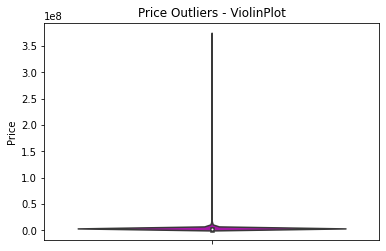

In [1079]:
sns.violinplot(
    data = nadlan_df,
    y=nadlan_df['Price'],
    color='m',
    whis=2,
    width=0.8
).set(title="Price Outliers - ViolinPlot")

In [1080]:
print(nadlan_df['Price'].max())
print(nadlan_df['Price'].median())

375000000
1590000.0


In [1081]:
nadlan_df[nadlan_df['Price']>5000000]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
35,2022-05-11,אשדוד,"הקריה מע""ר",כינור,10,3,5.0,31,238.0,6500000
51,2022-02-28,אשדוד,"הקריה מע""ר","צה""ל",2,3,6.0,39,276.0,5590000
66,2022-01-13,אשדוד,"הקריה מע""ר",כינור,22,3,5.0,23,255.0,6050000
118,2021-08-30,אשדוד,"הקריה מע""ר",כינור,10,3,6.0,30,250.0,7350000
274,2020-06-03,אשדוד,"הקריה מע""ר","צה""ל",2,3,6.0,38,289.0,5098000
...,...,...,...,...,...,...,...,...,...,...
218926,2021-10-07,תל אביב -יפו,נחלת יצחק,תוצרת הארץ,5,3,5.0,30,126.0,5112000
218932,2022-03-16,תל אביב -יפו,צמרות איילון,אלוני ניסים,4,3,6.0,30,226.0,9500000
218933,2017-06-27,תל אביב -יפו,צמרות איילון,אלוני ניסים,4,3,6.0,30,200.0,10450000
218934,2015-06-08,תל אביב -יפו,צמרות איילון,אלוני ניסים,4,3,5.0,30,213.0,5942000


#### in that table of prices above 5Mil, we can see that most of the apartments have a high squere_meter, number of rooms when the price rises.
#### but some of them are not, is it very unusual for an apartments who cost more then 5mil will have 38 squere meter, 47.. and so on 

In [1082]:
nadlan_df[(nadlan_df['Price']>5000000) & (nadlan_df['Square_Meter']<60)]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
46918,2017-11-02,גבעתיים,"הל""ה",Unknown,-1,3,1.0,1,33.000000,39333000
47279,2008-03-13,גבעתיים,"הל""ה",לכיש,14,3,1.0,1,32.000000,18333000
49471,2019-09-26,גבעתיים,שיכון חברת חשמל,המאבק,38,3,3.0,0,58.000000,5200000
49869,2020-12-14,גבעתיים,שינקין,כצנלסון,106,3,1.0,4,30.000000,72000000
50500,2013-05-29,גבעתיים,שינקין,כצנלסון,104,3,2.0,3,38.000000,80000000
...,...,...,...,...,...,...,...,...,...,...
198490,2017-01-19,תל אביב -יפו,רמת אביב,קרויס,6,3,3.0,1,47.200001,5300000
198599,2014-11-18,תל אביב -יפו,רמת אביב,גרונימן,4,0,2.5,1,55.500000,5300000
198823,2010-03-11,תל אביב -יפו,רמת אביב,גרונימן,6,3,3.0,1,55.500000,6000000
215412,2017-02-06,הרצלייה,הרצליה פיתוח,זבולון,2,3,2.0,4,50.349998,5920000


#### So, We'll Need to find a way to delete apartment with a very high price and very low squere_Meter & number of rooms

In [1083]:
nadlan_df.drop(index=nadlan_df[(nadlan_df['Square_Meter']<60) & (nadlan_df['Rooms']<4) & (nadlan_df['Price']>2500000)].index,inplace=True)
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212912 entries, 0 to 218938
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_Date        212912 non-null  datetime64[ns]
 1   City             212912 non-null  object        
 2   Neighborhood     212912 non-null  object        
 3   Street           212912 non-null  object        
 4   Building_Number  212912 non-null  int32         
 5   Property_Type    212912 non-null  category      
 6   Rooms            212912 non-null  float32       
 7   Floor            212912 non-null  int32         
 8   Square_Meter     212912 non-null  float32       
 9   Price            212912 non-null  int32         
dtypes: category(1), datetime64[ns](1), float32(2), int32(3), object(3)
memory usage: 12.4+ MB


In [1084]:
nadlan_df.to_csv("AllCities (After Handling).csv")